# Analysis of Marvel Characters
### The objective of this article is to understand the attributes of Marvel characters and what attributes actually makes them great. We also understand their origin and their relations with other comic characters. 
### Github link: https://github.com/tanvishah98/tanvishah98.github.io
### Author: Tanvi Shah

The Marvel Cinematic Universe is an American media franchise and shared universe centered on a series of superhero films produced by Marvel Studios. The films are based on characters that appear in American comic books published by Marvel Comics. The shared universe, much like the original Marvel Universe in comic books, was established by crossing over common plot elements, settings, cast, and characters. From this article, I try to analyze the qualities that the characters possess and what actually makes them a hero or a villain. <br>

Sources: <br>
https://www.telltalesonline.com/28598/popular-marvel-characters/ <br>
https://www.marvel.com/characters
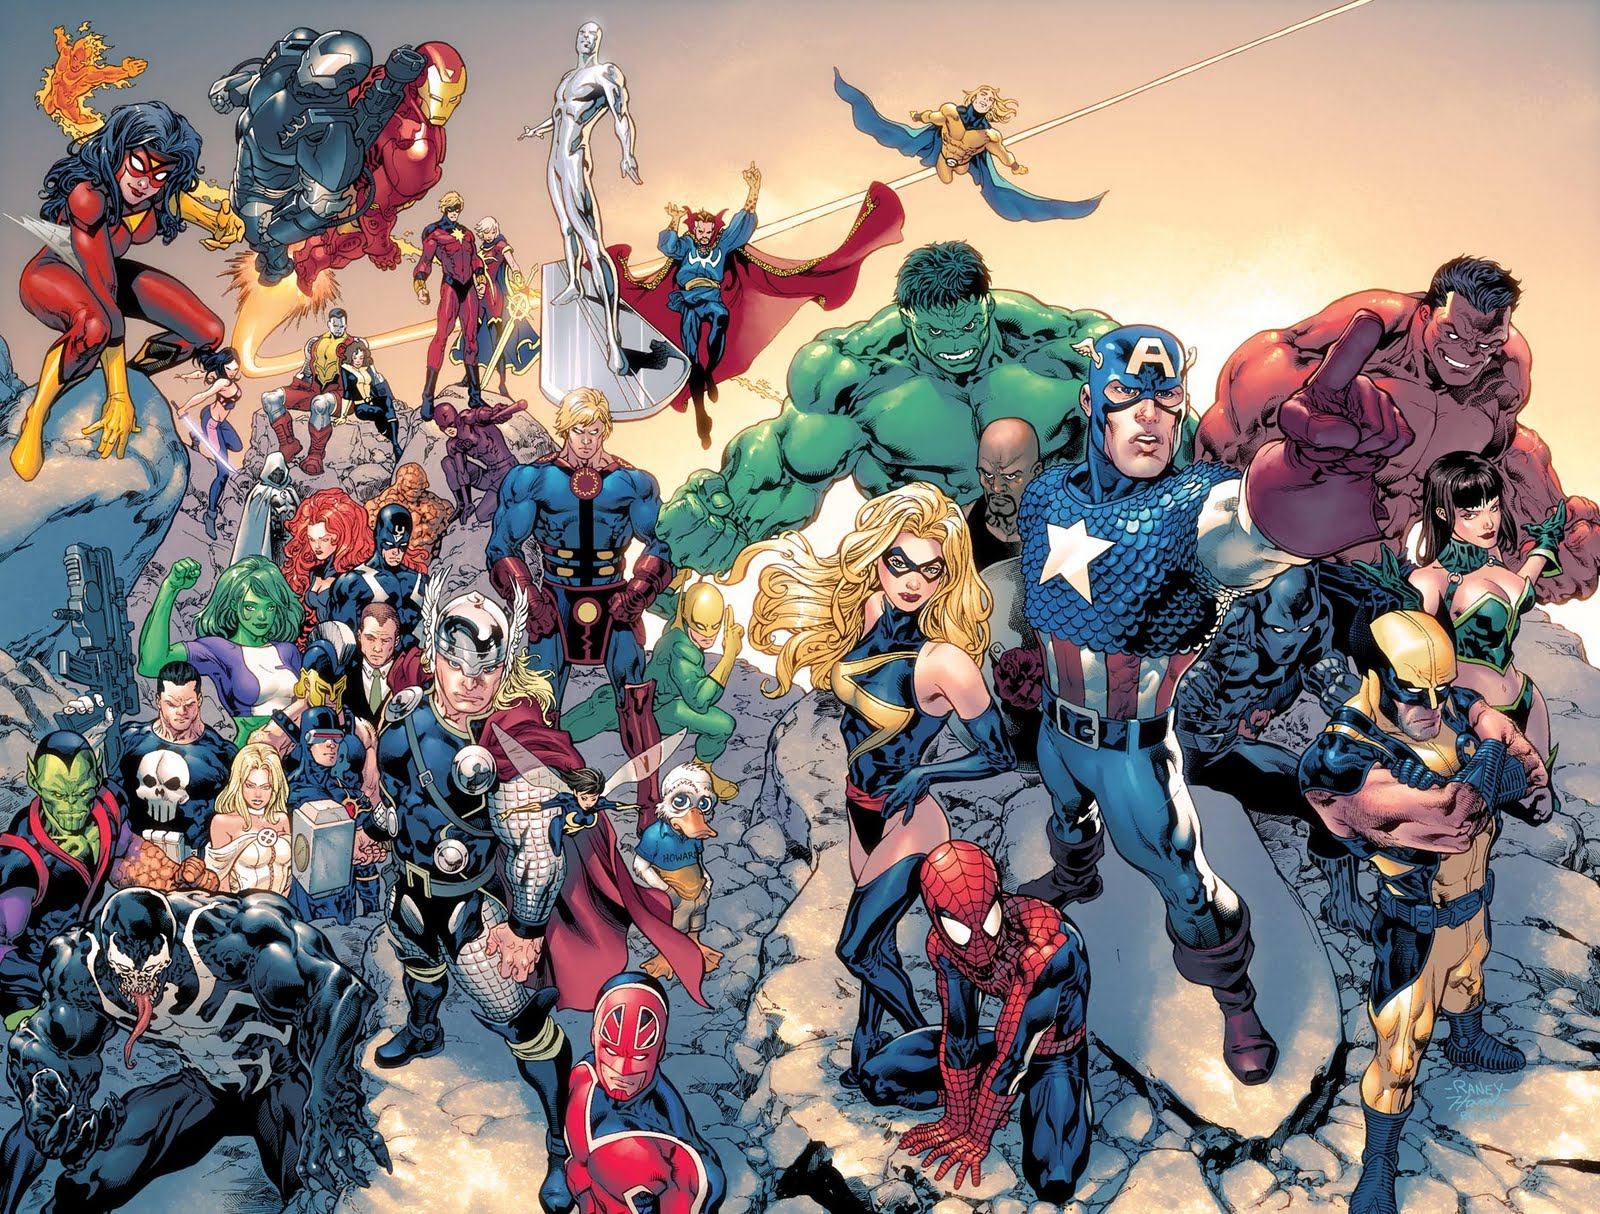

In [1]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
import bqplot.pyplot as bp
#imported all necessary libraries

I decided to use Kaggle to discover a dataset because it is one of the largest data repositories on the internet and the dataset is properly explained. I wanted to use a dataset from the entertainment industry since it's simple to tell a storey with it and it's fun to investigate.

I came across a number of datasets that compared characters from comic books and contained data on scripts and dialogues that were not particularly useful for further analysis and visualisation. Some of the statistics concerned movies, ratings, and release dates, which made little sense because it's difficult to build a storey with them. 

After a lot of trial and error with several comic, TV show, and movie datasets, I finally identified one that contained quantitative features for all Marvel superheroes. I experimented with numerous approaches to explore the data in general even within the dataset. The line graph of numerous qualities was one of the plots I made, however because there are so many data points and so much variation, the plot is highly confusing, as can be seen above.

This dataset compares all of the Marvel characters in the Marvel movies, as well as their traits. The name of the Marvel character, Intelligence, Alignment, Strength, Speed, Durability, Power, Combat, and the Total of all the attributes of those characters are the columns in this dataset.

The Alignment is divided into four categories: good, bad, neutral, and 0; good signifies the character was a hero, such as Spiderman or Iron Man. The term "bad" refers to a character who was well-known as a villain. The other attributes are scored on a scale of 0 to 100, with the total indicating where the character sits in relation to all of the given characteristics.
The data type for Name and Alignment is String (Object), while the data type for the remaining fields is integer. There are 611 rows and 9 columns in this table.

Dataset Link: https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv

In [2]:
marvel = pd.read_csv('marvel.csv') 
marvel = marvel.dropna() #dropping rows which have missing values
marvel

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [3]:
info = pd.read_csv('marvel_characters_info.csv')
info = info.dropna()
info['Race'] = info['Race'].replace(['-'],'Unknown')
info
#Replaced '-' with 'Unknown' because - specifies for non specified values

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


I merged marvel characters data with a different set of attributes to obtain information related to a specific attribute, since I will be using the data obtained to perform further analysis. I performed an inner join which matches the columns in both the tables based on 'Name' as the key.

In [4]:
final_data = marvel.merge(info, how='inner', right_on='Name', left_on='Name')
final_data

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,A-Bomb,good,38,100,17,80,17,64,316,0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,Abe Sapien,good,88,14,35,42,35,85,299,1,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,Abin Sur,good,50,90,53,64,84,65,406,2,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,Abomination,bad,63,80,53,90,55,95,436,3,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,Abraxas,bad,88,100,83,99,100,56,526,4,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Yellowjacket,good,88,10,12,28,12,14,164,728,good,Male,blue,Human,Blond,Marvel Comics,-,183.0,83.0
586,Yellowjacket II,good,50,10,35,28,31,28,182,729,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
587,Ymir,good,50,100,27,100,83,28,388,730,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
588,Zatanna,good,75,10,23,28,100,56,292,732,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [5]:
pm = pd.pivot_table(final_data, index = 'Alignment_x', columns='Publisher', values = 'Total', aggfunc = 'mean', fill_value=0)
pm

Publisher,ABC Studios,DC Comics,Dark Horse Comics,Hanna-Barbera,HarperCollins,Icon Comics,Image Comics,Marvel Comics,Microsoft,NBC - Heroes,Shueisha,Sony Pictures,SyFy,Team Epic TV,Universal Studios,Wildstorm
Alignment_x,,,,,,,,,,,,,,,,
bad,0,306.521739,0.000,0,0,148,5.0,260.316327,0,164.666667,0.0,0,0.0,5,0,0
good,166,232.075630,196.875,5,5,148,431.5,233.172131,425,136.000000,481.5,398,188.8,5,237,5
neutral,0,311.500000,0.000,0,0,0,0.0,408.000000,0,0.000000,0.0,0,0.0,0,0,0


In [6]:
gp = final_data.groupby(['Alignment_x']).mean();
gp

,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Height,Weight
Alignment_x,,,,,,,,,,
bad,50.856250,35.256250,28.243750,47.275000,45.043750,45.281250,251.956250,362.775000,107.413750,73.181250
good,43.498807,27.818616,27.644391,41.009547,39.601432,43.016706,222.589499,362.317422,103.708353,40.556086
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636,417.090909,230.181818,148.545455


In [7]:
plot1 = pd.pivot_table(marvel, index = 'Alignment', values = 'Total', aggfunc = 'mean', fill_value=0)
plot1

,Total
Alignment,
bad,247.212121
good,214.990741
neutral,355.363636


The data is used from Kaggle. This data is specifically explaining all the marvel characters and elaborates more on their qualities and attributes reflected in the Marvel movies. The Alignment shows if the character is percieved as a good hero, bad villain or a neutral character. The other attributes like Intelligence, Strength, Power, Speed, Combat,etc are rated on a range of 0-100. This data is combined with another data which talks more about the marvel characters and shows different qualities that they possess like gender, race, height, weight, etc. It talks about the Publisher as well. These both data are combined into one final data which is used to create the dashboard below. 

The description below explains the dashboard and the value it possesses. These datasets are used to understand more on the marvel characters, their origin, the strong attributes that they hold and their history. This is very helpful for all the marvel fans to understand more about their favorite characters. The contextual datasets linked below will help understand DC as well as Marvel characters together and how do they link with each other in varied aspects. They both are based on two different productions which started on the basis of comics. 

## Visualizing attributes of marvel characters

<IPython.core.display.Javascript object>


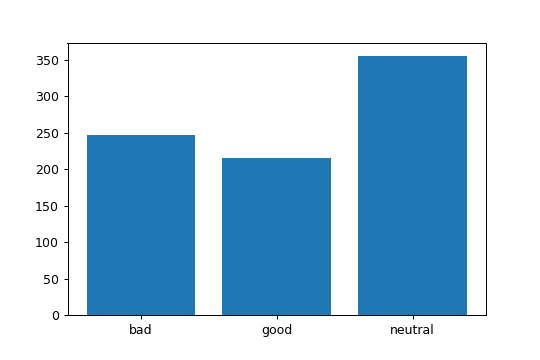

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

In [8]:
plt.bar(plot1.index, height = plot1.Total)
plt.show()
xnames = ['good','bad','neutral']
color = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
@ipywidgets.interact(style=plt.style.available, x=xnames, cmap=color)
#@ipy.interact()
def make_plot(style,x,cmap):
    print(x)
    xx = gp.drop(['Total'],axis=1)
    xx = xx[xx.index==x]
    xy = xx.T
    with plt.style.context(style):
        xy.plot(kind='bar', legend=False, label = 'index')
    plt.show()

I attempted to create a dashboard that shows the Alignment along with the average mean total score of all aspects. These characteristics are categorized as excellent, terrible, or neutral. I made a dropdown menu where users could see the Alignments as well as data for other traits like Intelligence, Strength, Power, Combat, and so on. The dashboard becomes interactive as a result of this, as the user can see how the other crucial information alter for different alignments. Basically, users can figure out what kind of traits 'good', 'bad', and 'neutral' have, implying that 'hero', 'villain', and 'neutral people' have the most and least.

# Effect of height and weight on the strength of a marvel character

In [9]:
plt.scatter(final_data['Height'],final_data['Weight'], c=final_data['Strength'])
plt.show()

The above scatterplot is one of the contextual visualization which shows a correlation between height and weight on the terms of strength. This plot helps in understanding how does height relate to the weight when it comes to strength.

# Dashboard related to characters and publishers which further visualizes race for a given character

In [10]:
#Barplot 1
x_scs = bqplot.OrdinalScale()
y_scs = bqplot.LinearScale()

x_axs = bqplot.Axis(label='Race', scale=x_scs)
y_axs = bqplot.Axis(label='Count', scale=y_scs, 
                   orientation = 'vertical')

barplot = bqplot.pyplot.bar(x = [], 
                         y = [],
                         scales={'x':x_scs, 'y':y_scs})

fig_bar = bqplot.Figure(marks=[barplot], axes=[x_axs,y_axs], fig_margin={'top':20, 'bottom':60, 'left':40, 'right':80})

In [11]:
mySelectedLabel = ipywidgets.Label()

In [12]:
# 2. Scales
col_sc = bqplot.ColorScale(scheme = 'Red') # In "color space" scale
x_sc = bqplot.OrdinalScale() # ordered, categorical data, because of having categorical bins
y_sc = bqplot.OrdinalScale()

# 3. Marks
heat_map = bqplot.GridHeatMap(color=pm, row=pm.index, column=pm.columns, scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})

# 4. Axis 
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, tick_rotate=315)
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical')

def barplot2(x, y):
        df2 = final_data[(final_data['Publisher'] == y) & (final_data['Alignment_x'] == x)]
        df2 = df2[df2['Intelligence'] != 0]
        df2 = df2['Race'].value_counts()
        return df2

# 5. Interactions
def on_selected(change): 
    if len(change['owner'].selected) == 1: # checking that user is only selecting one element
        i,j = change['owner'].selected[0]
        val = pm.values[i,j]
        mySelectedLabel.value = 'Data Value='+str(val)
        bp = barplot2(pm.index[i], pm.columns[j])
        if len(bp.index) > 0:
            barplot.x = bp.index
            barplot.y = bp.values
        else:
            barplot.x = []
            barplot.y = bp.values
        
heat_map.observe(on_selected,'selected')

# 6. Figure object
fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax], fig_margin={'top':30, 'bottom':100, 'left':80, 'right':100})
fig

fig.layout.min_width = '900px'
fig_bar.layout.min_width = '500px'

heatmap = ipywidgets.VBox([fig, fig_bar])
heatmap1 = ipywidgets.VBox([mySelectedLabel, heatmap])
heatmap1

The dashboard above is the second dataset I generated, and it has a lot more interaction than the first. It provides far more information than the first and aids the user in fully comprehending the underlying data as well as the dashboard's distinct point of view. The dashboard above displays the characters' Alignments in relation to their Publisher, as well as a detailed representation of the Marvel characters' races. I utilized a heatmap to display the average overall score value for the characters alignment, which includes 'good,' 'bad,' and 'neutral,' as well as the Publisher. On the side, I've constructed a bar plot that displays the Races of the corresponding box on the heatmap. Like For example, the characters who are neutral and published by DC Comics are largely humans, with a count of five and one for Bizzaro. This basic provides an in-depth understanding of the characters using several attributes. There are several non-recognized values in race that are unknown.

Conclusion:
    
This article helps to understand the Marvel characters and what makes them the character that they potray. The users get to visualize the qualities that make them a hero or a villain. The users can interact with the dashboards and understand the characters origin as well. This article gives an overall view of the characters and their in-depth overview.  

Thank you!